# MobileNetV2  -  Transfer Learning

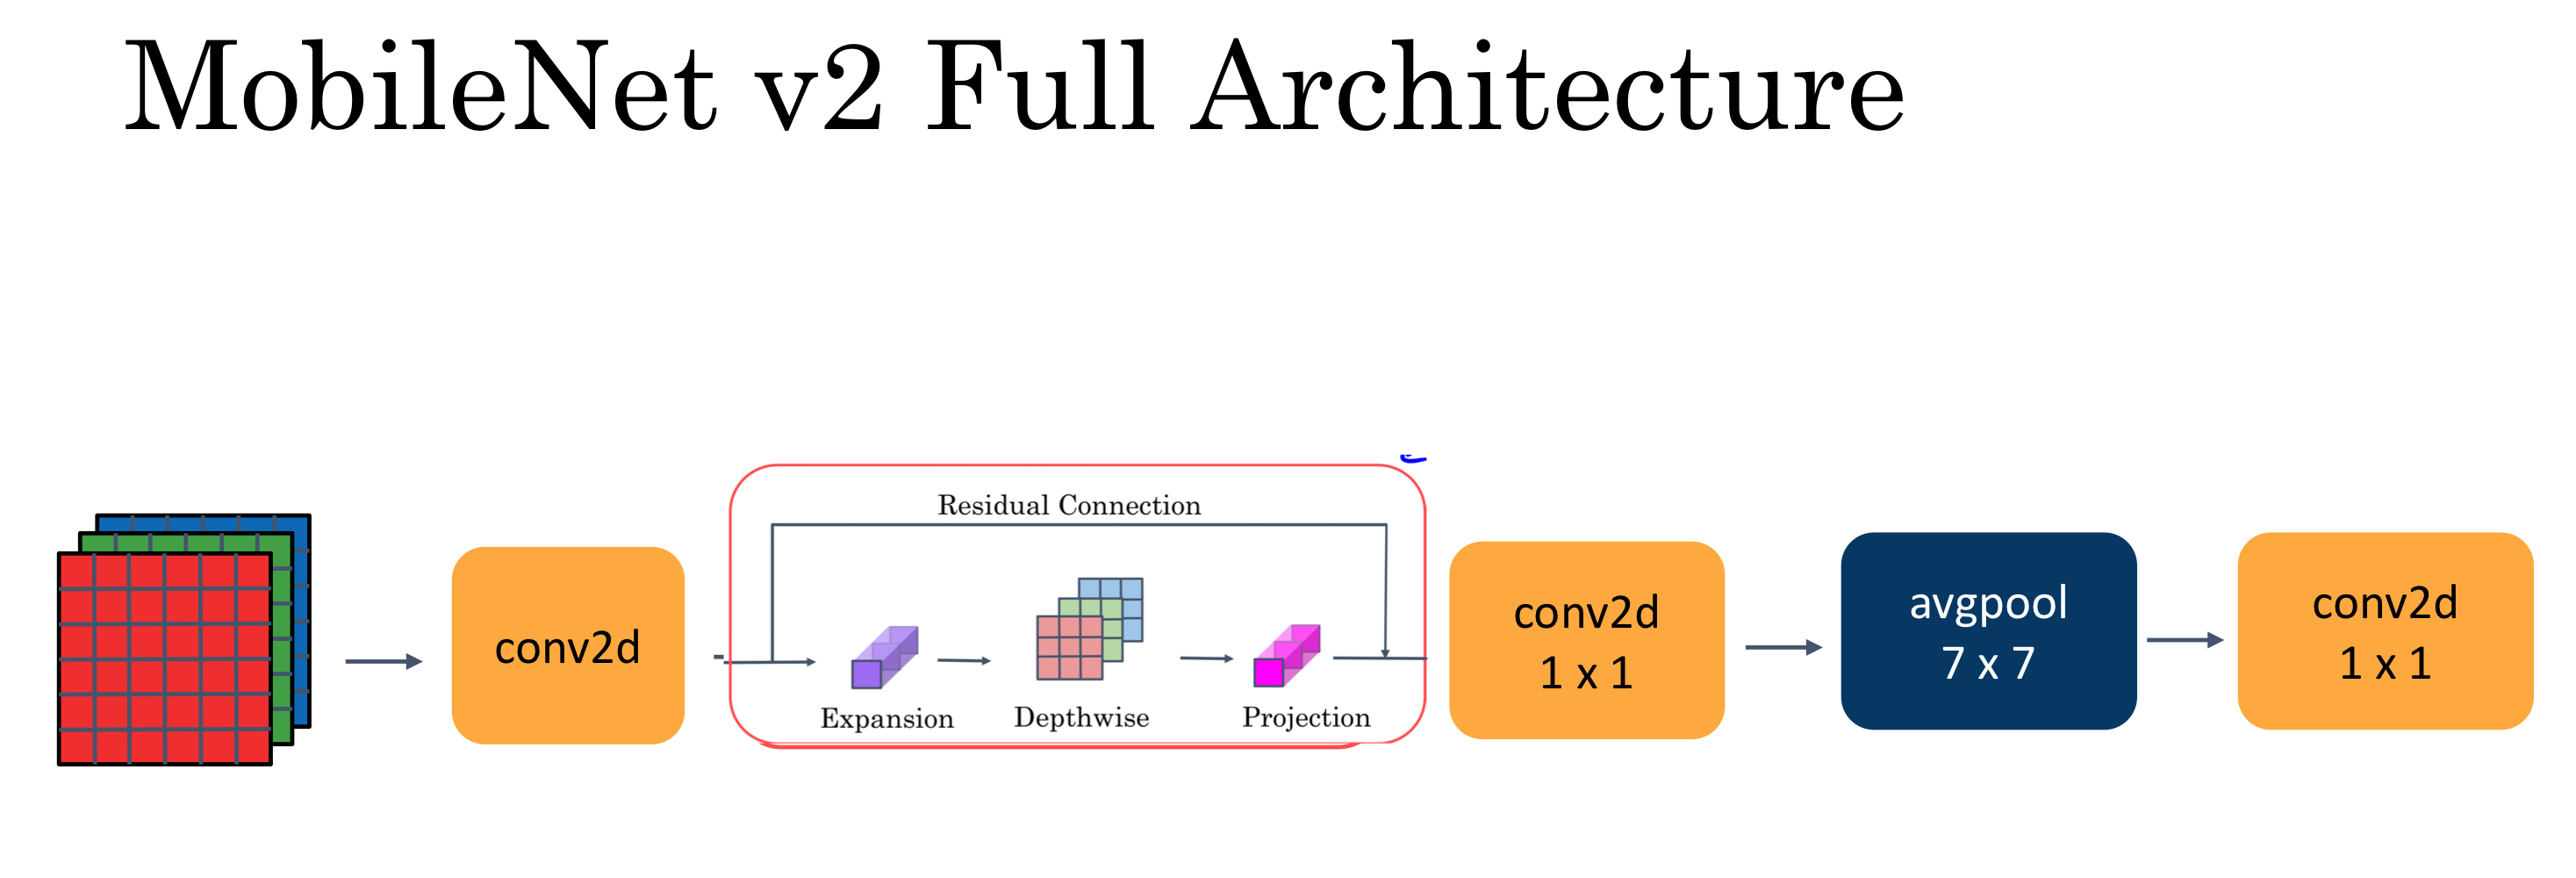

# 1.Import Python modules

In [1]:
import numpy as np
import pandas as pd
import PIL.Image as Image
import matplotlib.pylab as plt
import seaborn as sns

import cv2
import os


import tensorflow as tf
from tensorflow import keras
from keras.applications import MobileNetV2
from tensorflow.keras import layers
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import plot_model


# 2. load the model

In [2]:
model = MobileNetV2()

In [3]:
dir(model)

['_SCALAR_UPRANKING_ON',
 '_TF_MODULE_IGNORED_PROPERTIES',
 '__annotations__',
 '__call__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_aggregate_exact_metrics',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_get_config',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_autotune_steps_per_execution',
 '_base_model_initialized',
 '_build_input_shape',
 '_call_spec',
 '_callable_losses',
 '_captured_weight_regularizer',
 '_cast_single_input',
 '_check_call_args

In [4]:
# model name
model.name

'mobilenetv2_1.00_224'

In [5]:
# model summary
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [6]:
# get config
model.get_config()

{'name': 'mobilenetv2_1.00_224',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'registered_name': None,
   'name': 'input_1',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'Conv1',
    'trainable': True,
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (2, 2),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'linear',
    'use_bias': False,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    '

In [7]:
# get weights
model.get_weights()

[array([[[[-1.71659231e-01, -3.33731920e-01,  5.30122258e-02,
           -5.93232973e-21,  2.08742931e-01, -1.20433941e-01,
            1.75700430e-02, -3.10708203e-22, -9.62498877e-03,
            1.90229788e-01, -3.67278278e-01,  3.95997976e-22,
           -2.36236629e-22,  3.36706383e-22,  8.83555040e-02,
           -7.75416642e-02,  3.95842289e-05, -3.63377742e-02,
            5.99925742e-02,  5.53736472e-21, -4.68022423e-04,
           -1.23387486e-01, -1.34351701e-01,  8.75968020e-03,
           -2.47503355e-01,  1.58492010e-02, -2.43145856e-04,
           -1.09811597e-01,  5.55126644e-22, -2.03368161e-03,
            2.83311605e-01,  7.66634047e-02],
          [-3.18941772e-01, -6.09864295e-01, -1.70770675e-01,
           -6.76705635e-21, -5.82342505e-01, -2.56068230e-01,
           -4.18974347e-02,  1.32427304e-22,  2.00757684e-04,
            3.29488933e-01, -4.01886106e-01,  3.63034420e-22,
            1.64733595e-22,  1.97648923e-22,  9.94425565e-02,
           -1.17755957e-

In [8]:
model.input_shape

(None, 224, 224, 3)

In [30]:
layer_names = [layer.name for layer in model.layers]
print(len(layer_names))
layer_names

156


['input_1',
 'Conv1',
 'bn_Conv1',
 'Conv1_relu',
 'expanded_conv_depthwise',
 'expanded_conv_depthwise_BN',
 'expanded_conv_depthwise_relu',
 'expanded_conv_project',
 'expanded_conv_project_BN',
 'block_1_expand',
 'block_1_expand_BN',
 'block_1_expand_relu',
 'block_1_pad',
 'block_1_depthwise',
 'block_1_depthwise_BN',
 'block_1_depthwise_relu',
 'block_1_project',
 'block_1_project_BN',
 'block_2_expand',
 'block_2_expand_BN',
 'block_2_expand_relu',
 'block_2_depthwise',
 'block_2_depthwise_BN',
 'block_2_depthwise_relu',
 'block_2_project',
 'block_2_project_BN',
 'block_2_add',
 'block_3_expand',
 'block_3_expand_BN',
 'block_3_expand_relu',
 'block_3_pad',
 'block_3_depthwise',
 'block_3_depthwise_BN',
 'block_3_depthwise_relu',
 'block_3_project',
 'block_3_project_BN',
 'block_4_expand',
 'block_4_expand_BN',
 'block_4_expand_relu',
 'block_4_depthwise',
 'block_4_depthwise_BN',
 'block_4_depthwise_relu',
 'block_4_project',
 'block_4_project_BN',
 'block_4_add',
 'block_5_e

In [10]:
# num of output classes
num_classes = model.output_shape[-1]
num_classes

1000

# 3. Predictions

C:\Users\91956\AppData\Local\Temp\ipykernel_17520\3903401091.py:1: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  fileImage = Image.open(r"C:\Users\91956\OneDrive\DATA-SCIENCE-NARESHIT-OMKAR\GITHUB\re-arrange\full-stack-data-science\DeepLearning\ANN\bag.jpeg").convert("RGB").resize([224,224],Image.ANTIALIAS)


1/1 [==============================] - 1s 861ms/step
class: 748


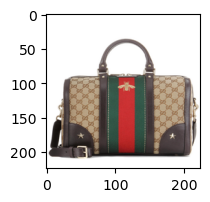

In [11]:
fileImage = Image.open(r"C:\Users\91956\OneDrive\DATA-SCIENCE-NARESHIT-OMKAR\GITHUB\re-arrange\full-stack-data-science\DeepLearning\ANN\bag.jpeg").convert("RGB").resize([224,224],Image.ANTIALIAS)
image = np.array(fileImage)
myimage = image.reshape(1, 224,224,3)
# prepare pixel data
myimage = myimage.astype('float32')
myimage = myimage/255.
plt.figure(figsize = (4,2))
plt.imshow(image)

my_predicted_image = model.predict(myimage)
y_class = np.argmax(my_predicted_image)
print("class:",y_class)

In [12]:
import requests

# Download the class labels for ImageNet
response = requests.get("https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json")
class_index = response.json()

# Map class indices to class names
class_names = [class_index[str(i)][1] for i in range(len(class_index))]

In [13]:
class_names[y_class]

'purse'

In [14]:
class_names

['tench',
 'goldfish',
 'great_white_shark',
 'tiger_shark',
 'hammerhead',
 'electric_ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house_finch',
 'junco',
 'indigo_bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water_ouzel',
 'kite',
 'bald_eagle',
 'vulture',
 'great_grey_owl',
 'European_fire_salamander',
 'common_newt',
 'eft',
 'spotted_salamander',
 'axolotl',
 'bullfrog',
 'tree_frog',
 'tailed_frog',
 'loggerhead',
 'leatherback_turtle',
 'mud_turtle',
 'terrapin',
 'box_turtle',
 'banded_gecko',
 'common_iguana',
 'American_chameleon',
 'whiptail',
 'agama',
 'frilled_lizard',
 'alligator_lizard',
 'Gila_monster',
 'green_lizard',
 'African_chameleon',
 'Komodo_dragon',
 'African_crocodile',
 'American_alligator',
 'triceratops',
 'thunder_snake',
 'ringneck_snake',
 'hognose_snake',
 'green_snake',
 'king_snake',
 'garter_snake',
 'water_snake',
 'vine_snake',
 'night_snake',
 'boa_constrictor',
 'rock_python',
 'Indian_cobr

In [15]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, decode_predictions
# Decode the predictions to get class names and probabilities
predictions = model.predict(myimage)
decoded_predictions = decode_predictions(predictions, top=5)[0]

# Print the class names and probabilities
for class_id, class_name, probability in decoded_predictions:
    print(f"{class_name}: {probability:.2f}")

1/1 [==============================] - 0s 47ms/step
purse: 0.58
mailbag: 0.33
backpack: 0.02
pencil_box: 0.02
radio: 0.01


# 4. Conclusion

In [23]:
def predict_image(filepath):
    fileImage = Image.open(filepath).convert("RGB").resize([224,224],Image.ANTIALIAS)
    image = np.array(fileImage)
    myimage = image.reshape(1, 224,224,3)
    # prepare pixel data
    myimage = myimage.astype('float32')
    myimage = myimage/255.
    plt.figure(figsize = (4,2))
    plt.imshow(image)

    my_predicted_image = model.predict(myimage)
    y_class = np.argmax(my_predicted_image)
    print("class:",y_class)
    
    predictions = model.predict(myimage)
    decoded_predictions = decode_predictions(predictions, top=5)[0]

    # Print the class names and probabilities
    for class_id, class_name, probability in decoded_predictions:
        print(f"{class_name}: {probability:.2f}")

1/1 [==============================] - 0s 29ms/step
class: 701
1/1 [==============================] - 0s 33ms/step


C:\Users\91956\AppData\Local\Temp\ipykernel_17520\292001930.py:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  fileImage = Image.open(filepath).convert("RGB").resize([224,224],Image.ANTIALIAS)


parachute: 0.84
quill: 0.02
balloon: 0.02
umbrella: 0.01
fireboat: 0.01


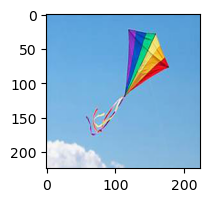

In [24]:
filepath=r"C:\Users\91956\OneDrive\DATA-SCIENCE-NARESHIT-OMKAR\GITHUB\re-arrange\full-stack-data-science\DeepLearning\Transfer Learning\kite.jpeg"
predict_image(filepath)

1/1 [==============================] - 0s 34ms/step
class: 84
1/1 [==============================] - 0s 31ms/step
peacock: 0.26
electric_ray: 0.09
vault: 0.03
brain_coral: 0.02
cardigan: 0.02


C:\Users\91956\AppData\Local\Temp\ipykernel_17520\292001930.py:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  fileImage = Image.open(filepath).convert("RGB").resize([224,224],Image.ANTIALIAS)


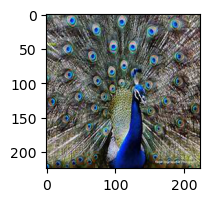

In [25]:
filepath=r"C:\Users\91956\OneDrive\DATA-SCIENCE-NARESHIT-OMKAR\GITHUB\re-arrange\full-stack-data-science\DeepLearning\Transfer Learning\peacock.jpeg"
predict_image(filepath)

1/1 [==============================] - 0s 29ms/step
class: 851
1/1 [==============================] - 0s 34ms/step


C:\Users\91956\AppData\Local\Temp\ipykernel_17520\292001930.py:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  fileImage = Image.open(filepath).convert("RGB").resize([224,224],Image.ANTIALIAS)


television: 0.92
microwave: 0.03
screen: 0.00
hand-held_computer: 0.00
oscilloscope: 0.00


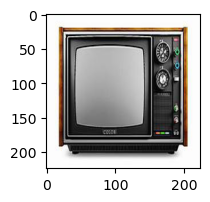

In [26]:
filepath=r"C:\Users\91956\OneDrive\DATA-SCIENCE-NARESHIT-OMKAR\GITHUB\re-arrange\full-stack-data-science\DeepLearning\Transfer Learning\tv.jpeg"
predict_image(filepath)

1/1 [==============================] - 0s 38ms/step
class: 861
1/1 [==============================] - 0s 31ms/step


C:\Users\91956\AppData\Local\Temp\ipykernel_17520\292001930.py:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  fileImage = Image.open(filepath).convert("RGB").resize([224,224],Image.ANTIALIAS)


toilet_seat: 0.18
pizza: 0.10
sundial: 0.08
wall_clock: 0.07
jigsaw_puzzle: 0.04


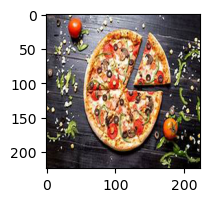

In [27]:
filepath=r"C:\Users\91956\OneDrive\DATA-SCIENCE-NARESHIT-OMKAR\GITHUB\re-arrange\full-stack-data-science\DeepLearning\Transfer Learning\pizza.jpeg"
predict_image(filepath)

1/1 [==============================] - 0s 43ms/step
class: 892
1/1 [==============================] - 0s 32ms/step


C:\Users\91956\AppData\Local\Temp\ipykernel_17520\292001930.py:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  fileImage = Image.open(filepath).convert("RGB").resize([224,224],Image.ANTIALIAS)


wall_clock: 0.54
analog_clock: 0.32
stopwatch: 0.00
barometer: 0.00
digital_clock: 0.00


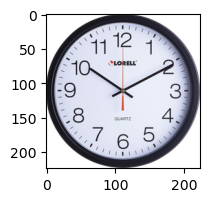

In [29]:
filepath=r"C:\Users\91956\OneDrive\DATA-SCIENCE-NARESHIT-OMKAR\GITHUB\re-arrange\full-stack-data-science\DeepLearning\Transfer Learning\clock.jpg"
predict_image(filepath)